In [1]:
# here we will be looking at KMeans and DBSCAN - two unsupervised clustering algorithms sealion provides.
# We will use a blob-dataset and the moons dataset, and visualize the clusters.


import sealion as sl # first step
from sealion.unsupervised_clustering import KMeans, DBSCAN # what algorithms we will use
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons # the datasets we will use

In [2]:
# the first step is to get the data. We will use roughly about 250 points from each.
X_blobs, _ = make_blobs(250, centers = 3, random_state = 42)
X_moons, _ = make_moons(250, random_state = 42)

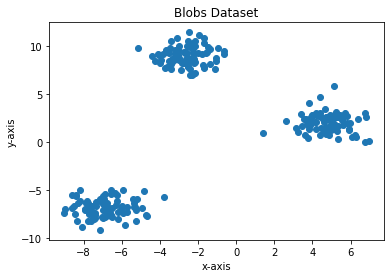

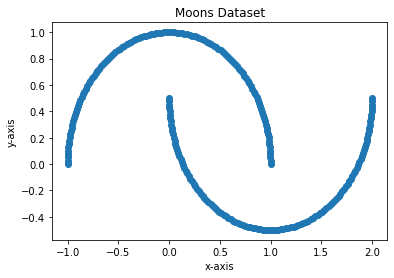

In [3]:
# next let's visualize our datasets
fig = plt.figure() # we'll use this a lot to make sure the figures don't keep changing
ax = fig.add_subplot()
ax.scatter(X_blobs[:, 0], X_blobs[:, 1])
plt.title("Blobs Dataset")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_moons[:, 0], X_moons[:, 1])
plt.title("Moons Dataset")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

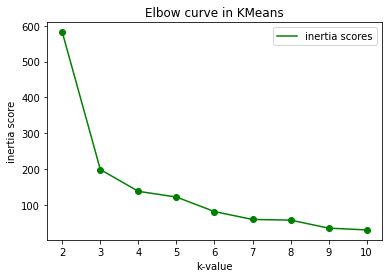

<Figure size 432x288 with 0 Axes>

In [4]:
# Let's first start with the blobbed dataset.
# As we can see a lot of data follows this pattern of being categories being in blobs when you plot them together.
# KMeans works well wth this kind of blobbed dataset, and we can expect DBSCAN to get similar results.

# usually we wouldn't know how many clusters our dataset has, so we guess. We can do this by plotting an inertia curve,
# and selecting the number of clusters at the x-axis of the elbow bend.

kmeans = KMeans()
kmeans.fit_predict(X_blobs) # first always call this method, just to give the data, before using the follow method
kmeans.visualize_elbow_curve(2, 10) # visualize from 2 - 10 elbow curves
fig = plt.figure()

In [5]:
# we clearly see that 3 is the elbow of the graph (it is of inertia scores, if you are curious)
# we want the elbow as it is typically the balance between having not too many nor too little clusters.

kmeans = KMeans(3)
kmeans_predictions_blobs = kmeans.fit_predict(X_blobs)

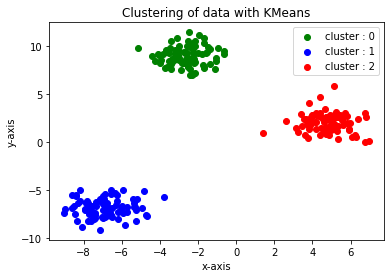

<Figure size 432x288 with 0 Axes>

In [6]:
# we won't print this but just use visualize it
# to do so you'll need a color_dict which is a dictionary - a keyfor each unique value in
# kmeans_predictions_blobs to its color (must be interpretable by matplotlib.) 
# This could look like {0 : "green", 1 : "blue", 2 : "red"} as
# we have 0, 1, 2 as our predictions

color_dict = {0 : "green", 1 : "blue", 2 : "red"}
kmeans.visualize_clustering(color_dict) # keep in mind these methods only work for 2D data.
fig = plt.figure()
# this will do pretty well.


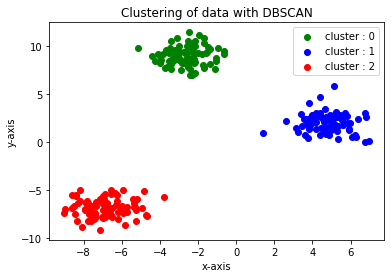

<Figure size 432x288 with 0 Axes>

In [7]:
'''
Know let's see if using DBSCAN makes a difference!

The way DBSCAN works is by looking at all the points around it in an 
epsilon (eps parameter) distance and seeing whether there are any instances close by.
If there are more instances in that radius or equal to the min_neighbors parameter (dependent
on how much data you have) - we can call that a core instance. Multiple core instances
within eps range will form a cluster. This cluster will represent one class of the
data.

If the eps parameter is too big then you may get all points under one cluster, and
if its too small you may get a bunch of different classes. Points with -1 label mean 
that they are identified to be noise points, not actually contributing anything to the
data. 

DBSCAN is slower than KMeans but does better on some datasets because it doesn't make
the assumption that the dataset has blobs. Perhaps you may have two clusters, but each
are parabolas (we will see this with the moons data), how would KMeans do on that? 
'''

dbscan = DBSCAN(eps = 3, min_neighbors=4) # eps = 3, min_neighbors = 4
dbscan_predictions_blobs = dbscan.fit_predict(X_blobs) # fit on this dataset
dbscan.visualize_clustering(color_dict) # this gives us the same result as KMeans
fig = plt.figure()

# not a big difference here 

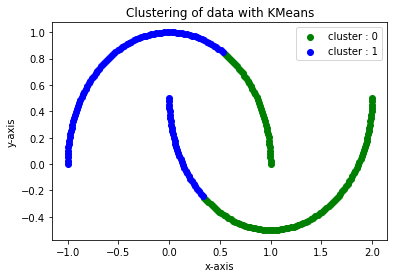

In [8]:
'''
Onto the moons dataset! We saw before its shape. It was two parabolas that at parts were
close together and far apart. Clearly those two parabolas are different categories of
data, but will KMeans think that? Only one way to find out. 
'''

kmeans = KMeans(k = 2) # 2 clusters
kmeans_predictions_moons = kmeans.fit_predict(X_moons)
kmeans.visualize_clustering(color_dict) # let's see

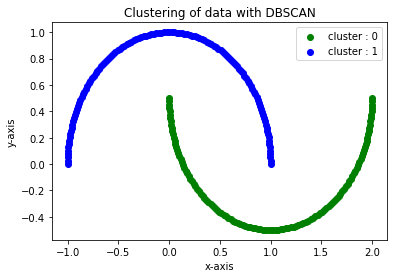

In [9]:
# Clearly we see KMeans creates two clusters that are not split how we want it.
# We want each parabola to be just one color (a.k.a. one class!)

# let's see dbscan
fig = plt.figure()
dbscan = DBSCAN(eps = 0.45, min_neighbors=15) # trust me, after a lot of searching these parameters work best
dbscan_predictions_moons = dbscan.fit_predict(X_moons)
dbscan.visualize_clustering(color_dict)

# Look's here like DBSCAN does much better. That's because it doesn't really care
# if the data is a curve or a ball.
# However, you may have noticed that it took significantly longer on this dataset
# than KMeans, but did a better job. That's because its looking for the nearby points, so
# more points increases runtime exponentially. KMeans is a lot more
# practical and scalable, but DBSCAN is much more interesting (especially to build.)